In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import importlib
from utils import plottingMetric
from utils.plottingMetric import *
importlib.reload(plottingMetric)

<module 'utils.plottingMetric' from 'd:\\Documents_D_Drive\\~NIT study\\NIT-Goa\\Fourth year\\Lectures\\Sem 7\\ML\\CS401-IML-Assignment\\utils\\plottingMetric.py'>

Data Extraction

In [2]:
# path = 'C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\linearlySeparabel\\class1_train.txt'
directoryPath = '1_Data\\1_Data\\group2\\classification\\linearlySeparable'

In [3]:
df = pd.DataFrame(columns=['col1','col2','className'])
df_test = pd.DataFrame(columns=['col1','col2','className'])


#merge all the training df related with the linearly separable into one
for i in range(1,5):
    filePath = directoryPath + '\\class' + str(i) + '_train.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df.loc[len(df)] = row 
for i in range(1,5):
    filePath = directoryPath + '\\class' + str(i) + '_test.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_test.loc[len(df_test)] = row 

In [4]:
df['col1'] = df['col1'].astype('float')
df['col2'] = df['col2'].astype('float')
df_test['col1'] = df_test['col1'].astype('float')
df_test['col2'] = df_test['col2'].astype('float')

In [5]:
df.head()

,col1,col2,className
0,3.089700,-1.46600,1
1,0.000538,-0.29346,1
2,-5.461700,3.47510,1
3,-0.858090,-0.31362,1
4,-0.719010,-0.87089,1


In [6]:
df.className.value_counts()

1    250
2    250
3    250
4    250
Name: className, dtype: int64

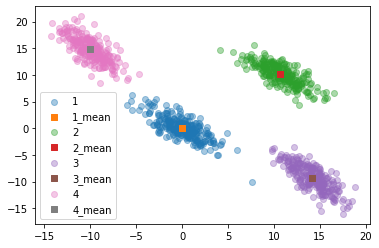

In [7]:
def data_plot(df):
    groups = df.groupby('className')

    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.4)
        mean_label = str(name) + '_mean'
        plt.scatter(x = group.col1.mean(), y = group.col2.mean(), marker='s', label = mean_label, alpha=1)
    plt.legend()
    plt.show()

data_plot(df)

In [11]:
nn_classifier = KNeighborsClassifier(n_neighbors = 1)

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

nn_classifier.fit(X, y)
y_pred = nn_classifier.predict(df_test.iloc[:,:-1])
#predict the accuracy of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(df_test.iloc[:,-1], y_pred)

1.0

# Decision Boundary Plot

In [9]:
#defining the boundaries of the domain
df_global = df
def decision_plot(df, classifier, title = "Training Data"):   
    min1, max1 = df_global.iloc[:,0].min()-1, df_global.iloc[:,0].max()+1
    min2, max2 = df_global.iloc[:,1].min()-1, df_global.iloc[:,1].max()+1
    # print(min1,max1,min2,max2)
    #define all the range
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()

    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    yhat = classifier.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contour(xx, yy, zz, colors='k')
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)
    groups = df.groupby('className')
    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.4)
    plt.title(title)
    plt.legend()
    plt.show()

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


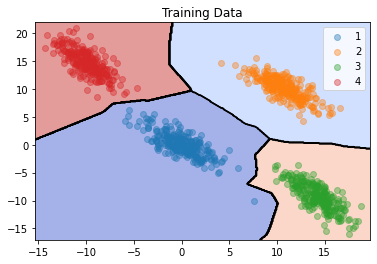

In [12]:
#Decision Plot of all training data imposed
decision_plot(df, nn_classifier, title = "Training Data")

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


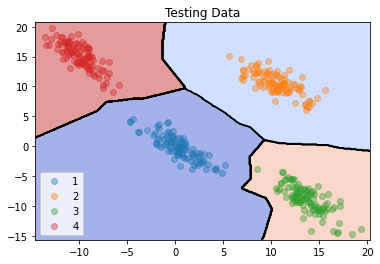

In [138]:
#Decision Plot of all the testing data superimposed
decision_plot(df_test, nn_classifier, "Testing Data")

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

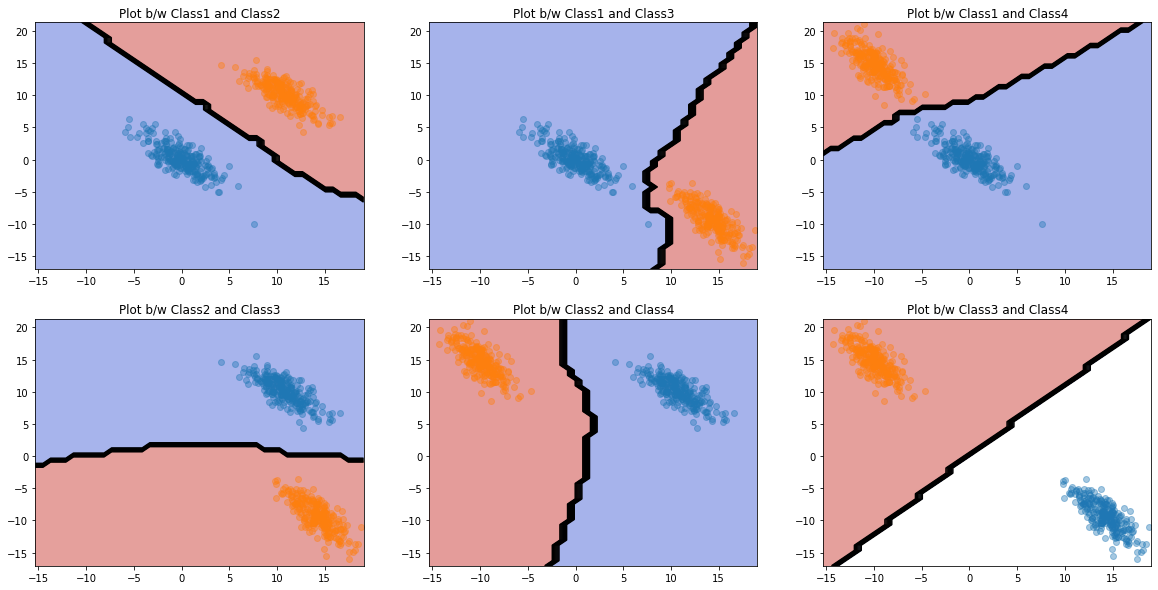

In [55]:
#Pair wise plots
from itertools import combinations

pairs = list(combinations(df.className.unique(), 2))

fig, axes = plt.subplots(2,3,figsize=(20,10))
for pair_idx, pair in enumerate(pairs):
    dataframe = df[(df.className == pair[0]) | (df.className == pair[1])]
    pairwise_classifier = KNeighborsClassifier(n_neighbors=1)

    X = dataframe.iloc[:,:-1]
    y = dataframe.iloc[:, -1]

    pairwise_classifier.fit(X, y)
    x = pair_idx//3
    y1 = pair_idx%3 
    decision_subplots(axes[x,y1],dataframe, pairwise_classifier,df, title = f"Plot b/w Class{pair[0]} and Class{pair[1]}",steps=0.8)



plt.show()



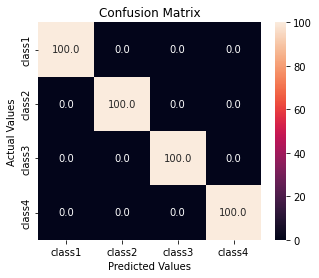

In [28]:
#Plot of the confusion matrix


plot_confusion_matrix(df_test, y_pred)

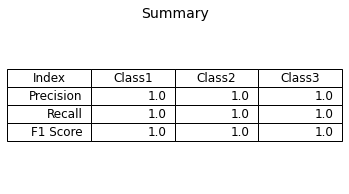

In [ ]:
plot_metric_summary(df_test, y_pred)

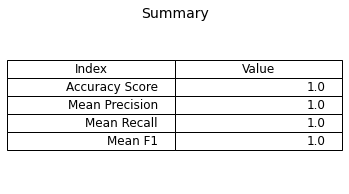

In [ ]:
plot_mean_matrix(df_test, y_pred)

### KNN

Optimal k value: 1


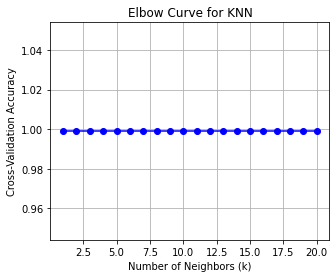

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

k_values = range(1, 21)  

cross_validation_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  
    cross_validation_score.append(scores.mean())


plt.figure(figsize=(5, 4))
plt.plot(k_values, cross_validation_score, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Find the optimal k value (the one with the highest accuracy)
optimal_k = k_values[np.argmax(cross_validation_score)]
print(f'Optimal k value: {optimal_k}')

plt.show()


The optimum value of K = 1
which is nothing but the nearest neighbour classifier done earlier.

### Reference template Classifier

In [56]:

class ReferenceTemplateClassifier():
    def __init__(self):
        self.mean = []
    
    def fit(self, df):
        groups = df.groupby('className')
        for name, group in groups:
            mean_value = (group['col1'].mean(), group['col2'].mean(), name)
            self.mean.append(mean_value)
        return self.mean

    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for mean_tuple in self.mean:
                distance = np.sqrt((row[0] - mean_tuple[0])**2 + (row[1] - mean_tuple[1])**2)
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = mean_tuple[2]
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [57]:
referenceTemplateClassifier = ReferenceTemplateClassifier()
referenceTemplateClassifier.fit(df)
test_data = df_test[['col1','col2']].to_numpy()
y_pred = referenceTemplateClassifier.predict(test_data)

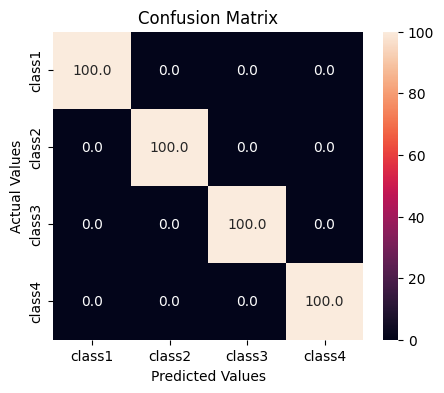

In [ ]:
plot_confusion_matrix(df_test, y_pred)

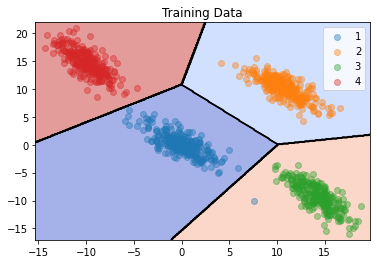

In [58]:
decision_plot(df, referenceTemplateClassifier)

Testing Data Plot with decision boundary 

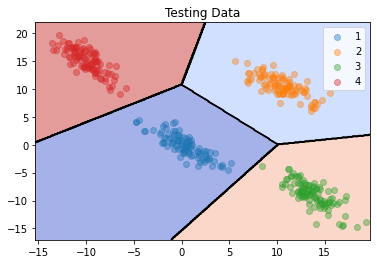

In [59]:
decision_plot(df_test, referenceTemplateClassifier, title = "Testing Data")

In [ ]:
# Pairwise Plots using reference templates

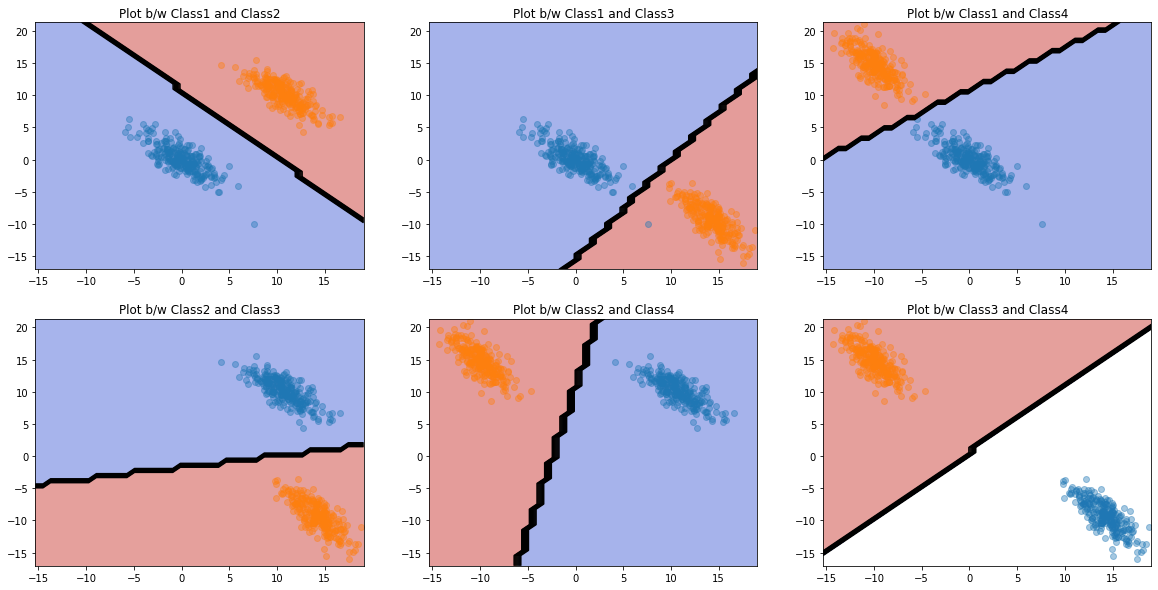

In [53]:
from itertools import combinations

pairs = list(combinations(df.className.unique(), 2))

fig, axes = plt.subplots(2,3,figsize=(20,10))
for pair_idx, pair in enumerate(pairs):
    dataframe = df[(df.className == pair[0]) | (df.className == pair[1])]
    pairwise_classifier = ReferenceTemplateClassifier()

    pairwise_classifier.fit(dataframe)

    x = pair_idx//3
    y = pair_idx%3 
    decision_subplots(axes[x,y],dataframe,pairwise_classifier,df, title = f"Plot b/w Class{pair[0]} and Class{pair[1]}",steps=0.8)

plt.show()

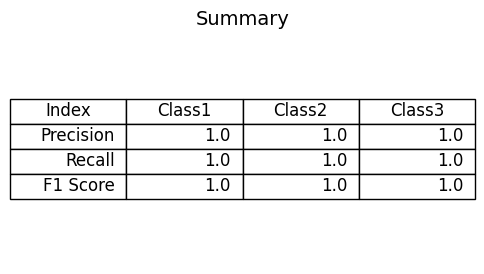

In [ ]:
plot_metric_summary(df_test, y_pred)

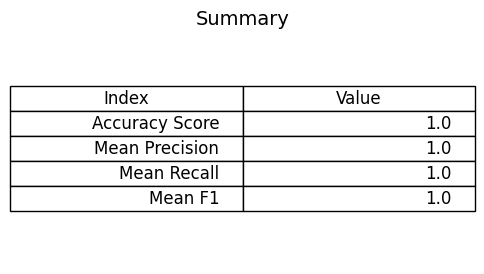

In [ ]:
plot_mean_matrix(df_test, y_pred)

### Reference template with mean vector and covariance

In [38]:
import importlib
import classifiers.ReferenceTemplateClassifier 
importlib.reload(classifiers.ReferenceTemplateClassifier)

<module 'classifiers.ReferenceTemplateClassifier' from 'd:\\Documents_D_Drive\\~NIT study\\NIT-Goa\\Fourth year\\Lectures\\Sem 7\\ML\\CS401-IML-Assignment\\classifiers\\ReferenceTemplateClassifier.py'>

In [39]:
from classifiers.ReferenceTemplateClassifier import ReferenceTemplateClassifier_Mahalodian 

rtc = ReferenceTemplateClassifier_Mahalodian()
rtc.fit(df)
test_data = df_test[['col1','col2']].to_numpy()
y_pred = rtc.predict(test_data)

Decision Plot with training data

-15.332 19.838 -17.046 21.998


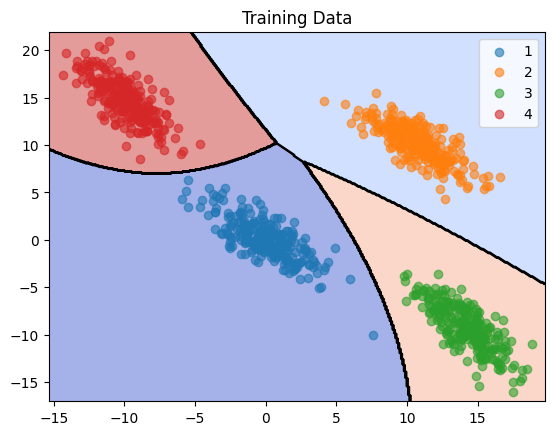

In [ ]:
decision_plot(df, rtc, title="Training Data")

-14.597 20.333 -15.667 20.738


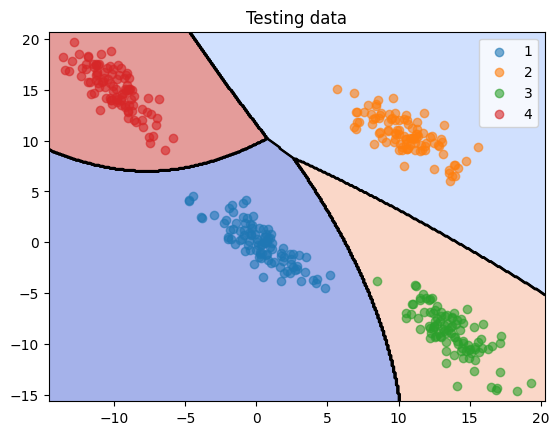

In [ ]:
decision_plot(df_test, rtc, title="Testing data")

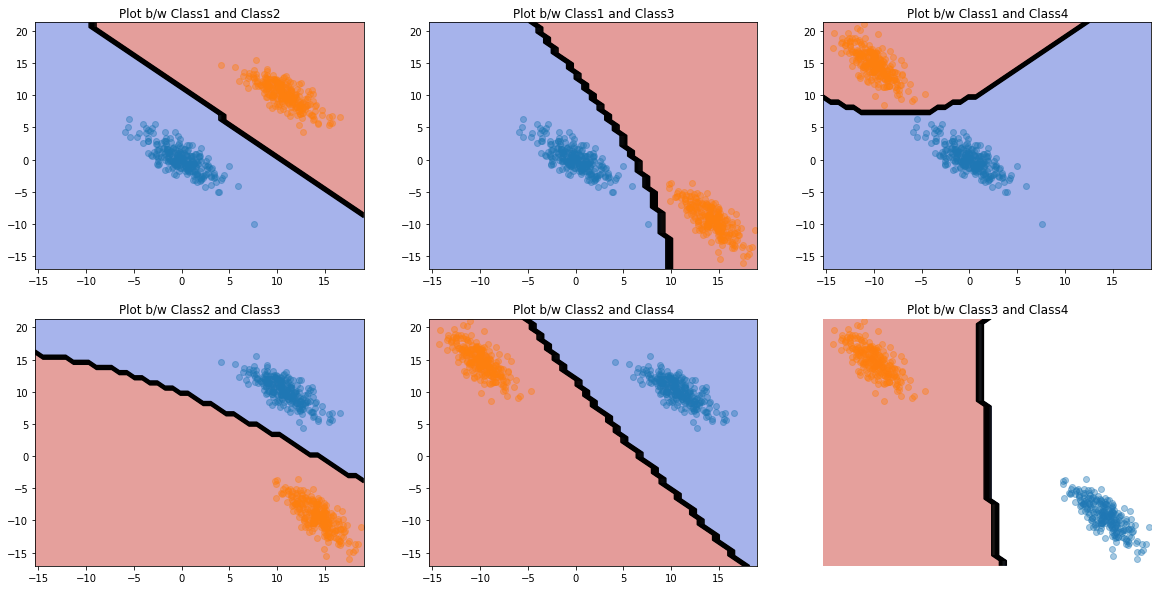

In [43]:
pairs = list(combinations(df.className.unique(), 2))

fig, axes = plt.subplots(2,3,figsize=(20,10))
for pair_idx, pair in enumerate(pairs):
    dataframe = df[(df.className == pair[0]) | (df.className == pair[1])]
    pairwise_classifier = ReferenceTemplateClassifier_Mahalodian()

    pairwise_classifier.fit(dataframe)
    # decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")
    x = pair_idx//3
    y = pair_idx%3 
    decision_subplots(axes[x,y],dataframe,pairwise_classifier,df, title = f"Plot b/w Class{pair[0]} and Class{pair[1]}",steps=0.8)

axes[1,2].axis('off')

plt.show()

In [60]:
confusion_matrix(df_test.iloc[:,-1].values,y_pred)

array([[100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0, 100,   0],
       [  0,   0,   0, 100]], dtype=int64)

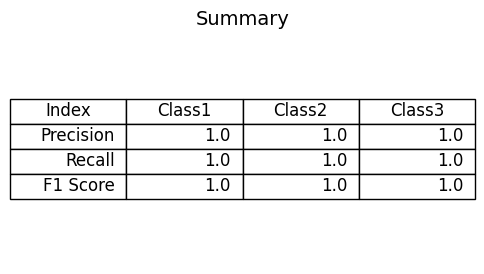

In [ ]:
plot_metric_summary(df_test, y_pred)

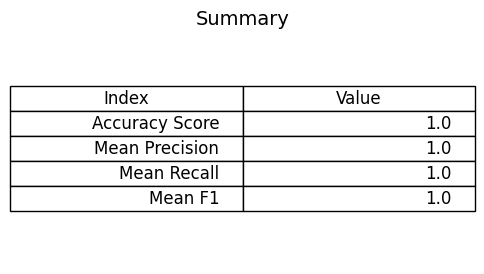

In [ ]:
plot_mean_matrix(df_test, y_pred)

In [8]:
import utils.decisionPlots
from utils.decisionPlots import decision_subplots   
import importlib
importlib.reload(utils.decisionPlots)

<module 'utils.decisionPlots' from 'd:\\Documents_D_Drive\\~NIT study\\NIT-Goa\\Fourth year\\Lectures\\Sem 7\\ML\\CS401-IML-Assignment\\utils\\decisionPlots.py'>

### Bayes Classifier- Unimodal Gaussian Density

In [9]:
from classifiers.BayesClassifier import *

bbc = BivariateBayesClassifier()

In [10]:
BayesCovarianceCases = [['same','diagonal'],['same','full','classwise'],['same','full','entire'],['different','diagonal'],['different','full']]

4. Decision region plot for all the classes together with the training data superposed

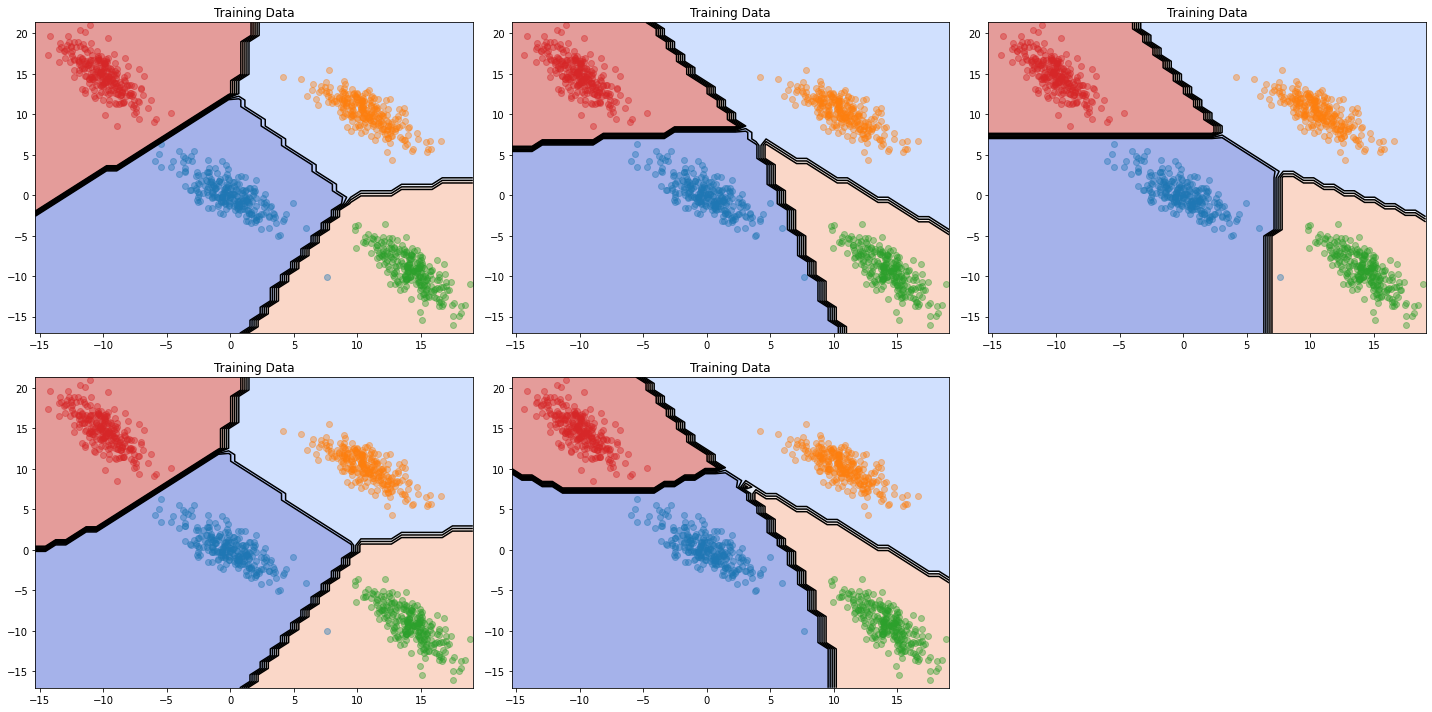

In [36]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for case in range(len(BayesCovarianceCases)):
    bbc.fit(df,*BayesCovarianceCases[case])
    x = case//3
    y = case%3 
    decision_subplots(axes[x,y],df,bbc,df,title=f"Training Data",steps=0.8)

axes[1,2].axis('off')
plt.tight_layout()
plt.show()

5. Decision region plot for all the classes together with the testing data superposed

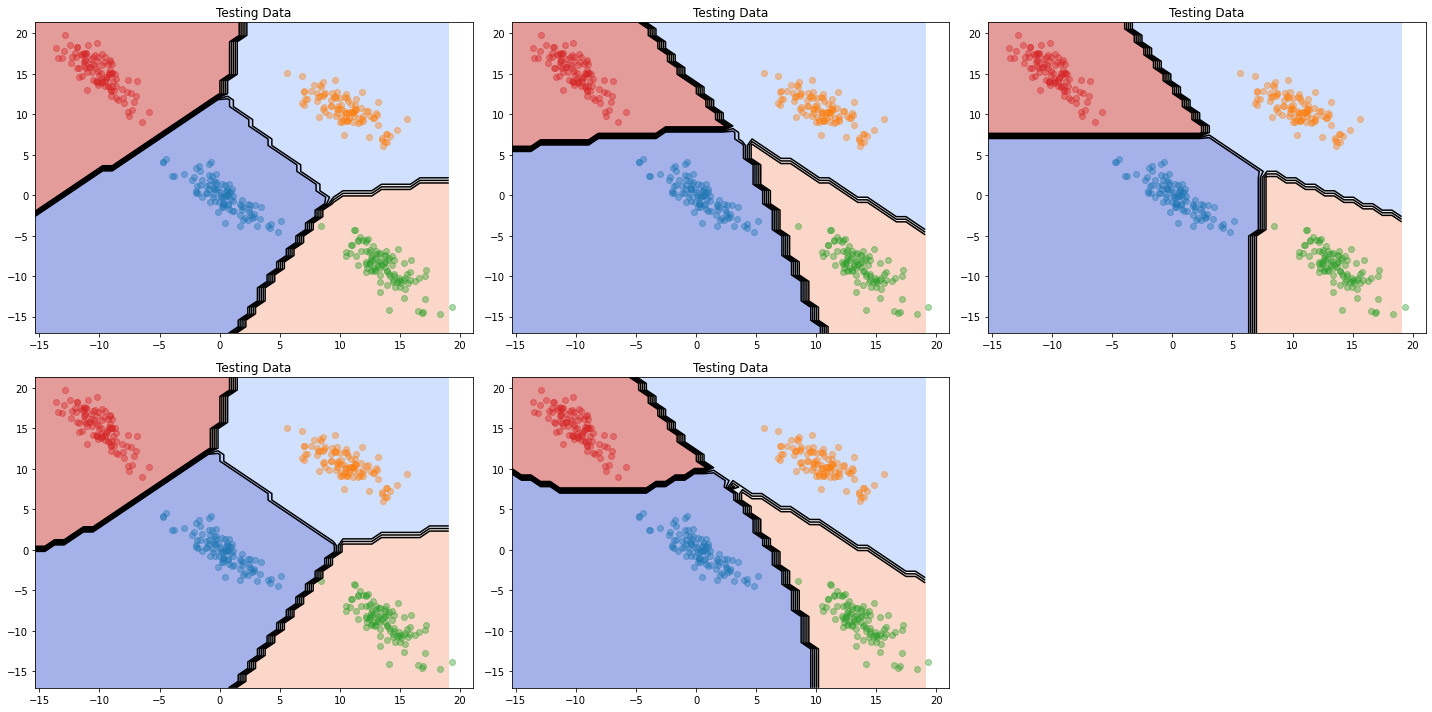

In [34]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
#6th plot should be empty as we have only 5 plots

for case in range(len(BayesCovarianceCases)):
    bbc.fit(df,*BayesCovarianceCases[case])
    x = case//3
    y = case%3 
    decision_subplots(axes[x,y],df_test,bbc,df,title=f"Testing Data",steps=0.8)
axes[1,2].axis('off')
plt.tight_layout()
plt.show()

3. Decision  region  plot  for  every  pair  of  classes  with  the  respective  training  data 
superimposed

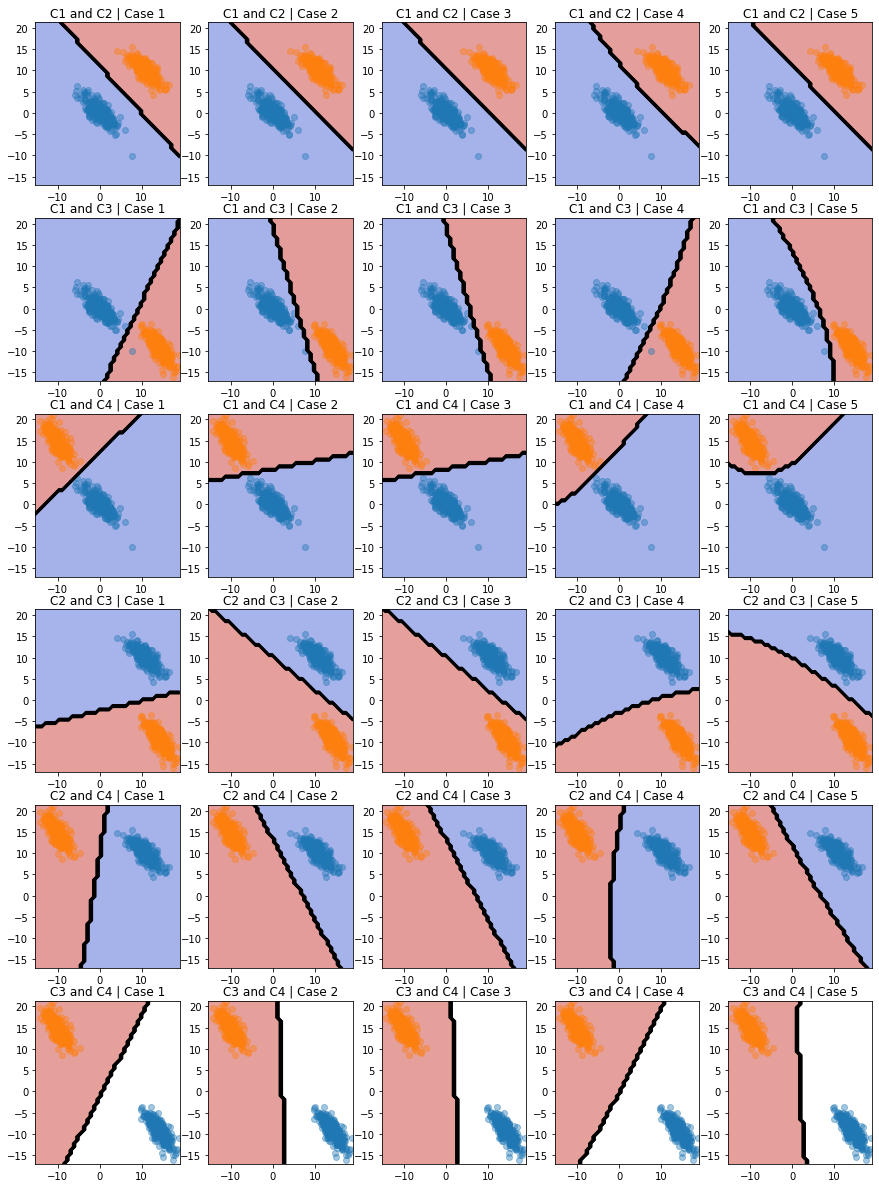

In [28]:
from itertools import combinations
pairs = list(combinations(df.className.unique(), 2))

fig, axes = plt.subplots(6, 5, figsize=(15, 21))

for pair_idx, pair in enumerate(pairs):
    dataframe = df[(df.className == pair[0]) | (df.className == pair[1])]
    for case in range(5):
        pairwise_classifier = BivariateBayesClassifier()
        pairwise_classifier.fit(dataframe,*BayesCovarianceCases[case])
        decision_subplots(axes[pair_idx,case], dataframe, pairwise_classifier,df, title = f"C{pair[0]} and C{pair[1]} | Case {case+1}",steps=0.8)

# plt.tight_layout()
plt.show()

In [12]:
testingData = df_test[['col1','col2']].to_numpy()

Case  1


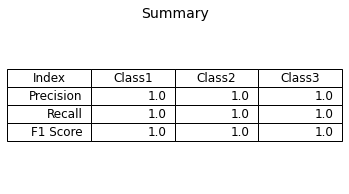

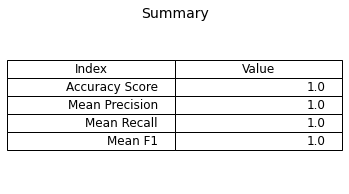

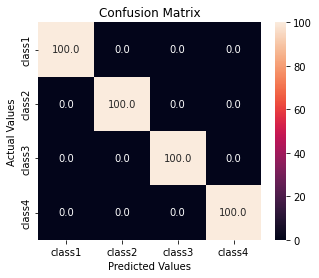

Case  2


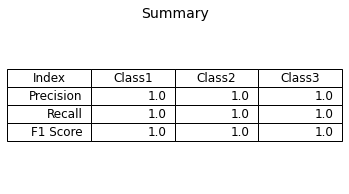

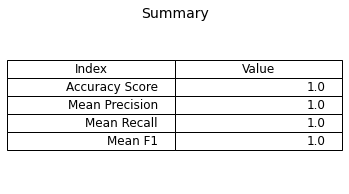

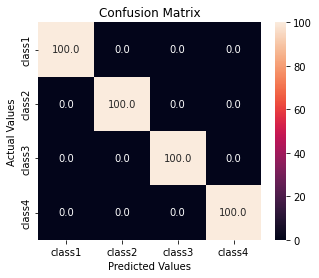

Case  3


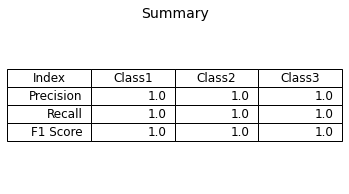

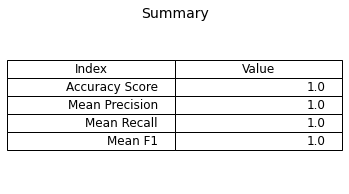

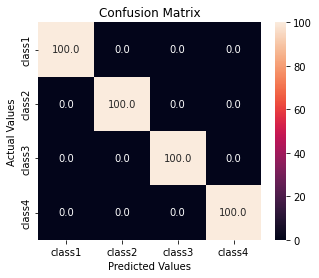

Case  4


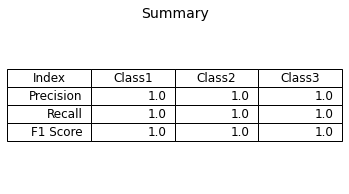

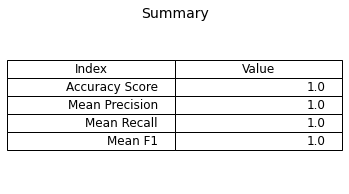

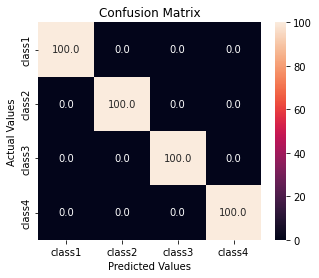

Case  5


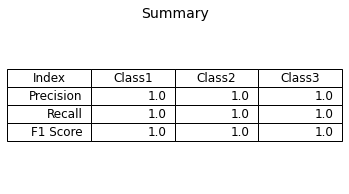

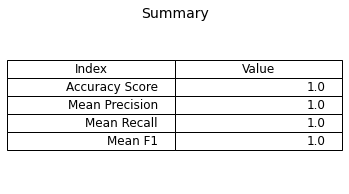

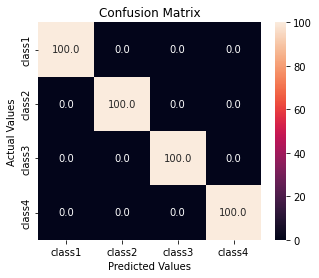

In [33]:


for i in range(len(BayesCovarianceCases)):
    bbc.fit(df,*BayesCovarianceCases[0])
    y_pred = bbc.predict(testingData)
    print("Case ",i+1)
    plot_metric_summary(df_test, y_pred)
    plot_mean_matrix(df_test, y_pred)
    plot_confusion_matrix(df_test, y_pred)

